In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def distance(x, a,b):
    return np.linalg.norm((x[a]-x[b]))

In [107]:
pos_original = np.random.rand(10,2)
#pos_original = np.array([[0,0],[1,0],[1,1],[0,1],[0,.5],[.5,0],[1,.5],[.5,1]])
cities = len(pos_original)
dis_original = sum([distance(pos_original, x,x+1) for x in range(cities-1)])
print("{:.1f}".format(dis_original))

5.8


In [108]:
pos_rand = np.copy(pos_original)
pos_temp = np.copy(pos_original)
dis_rand = dis_original

In [109]:
for t in range(50000):
    np.random.shuffle(pos_temp)
    dis_temp = sum([distance(pos_temp, x,x+1) for x in range(cities-1)])
    if dis_rand >dis_temp:
        dis_rand = dis_temp
        pos_rand = np.copy(pos_temp)
print("{:.2f}".format(dis_rand))

2.87


In [110]:
pos_metro = np.copy(pos_original)
dis_metro = dis_original
permutations = [(a,b) for a in range(cities) for b in range(cities) if a!=b]

3.02


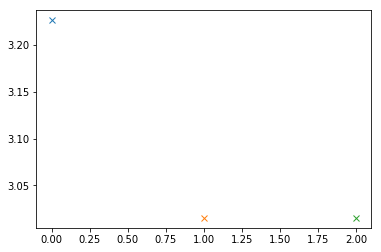

In [111]:
for i in range(3):
    for n, (a,b) in enumerate(permutations):
        pos_temp = np.copy(pos_metro)
        pos_temp[a], pos_temp[b] = pos_metro[b], pos_metro[a]
        dis_temp =  sum([distance(pos_temp, x,x+1) for x in range(cities-1)])
        if dis_metro >= dis_temp:
            dis_metro = dis_temp
            pos_metro = np.copy(pos_temp)
    plt.plot(i,dis_metro,"x")
print("{:.2f}".format(dis_metro))

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


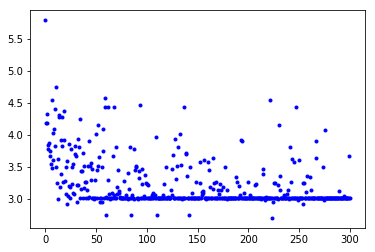

In [112]:
permutations = [(a,b) for a in range(cities) for b in range(cities) if a!=b]
pos_metro2 = np.copy(pos_original)
dis_metro2 = dis_original
temps = np.linspace(0,300,500)
for t in temps:
    pos_metro2t = np.copy(pos_original)
    dis_metro2t = dis_original
    for i in range(2):
        for n, (a,b) in enumerate(permutations):
            pos_temp = np.copy(pos_metro2t)
            pos_temp[a], pos_temp[b] = pos_metro2t[b], pos_metro2t[a]
            dis_temp =  sum([distance(pos_temp, x,x+1) for x in range(cities-1)])
            if dis_metro2t > dis_temp:
                dis_metro2t = dis_temp
                pos_metro2t = np.copy(pos_temp)
            elif np.random.rand() >= np.exp(-(dis_temp-dis_metro2t)/t):
                dis_metro2t = dis_temp
                pos_metro2t = np.copy(pos_temp)  

    if dis_metro2t<dis_metro2:
        dis_metro2 = dis_metro2t
        pos_metro2 = np.copy(pos_metro2t)  
    plt.plot(t,dis_metro2t,".b")

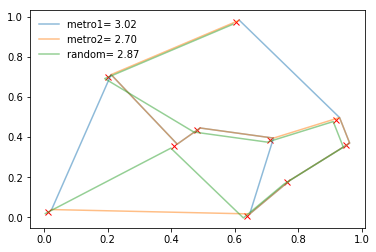

In [113]:
#plt.plot(pos_original[:,0], pos_original[:,1], "--", alpha=.5, label="origi {:3.1f}".format(dis_original))
plt.plot(pos_original[:,0], pos_original[:,1], "xr")
plt.plot(pos_metro[:,0]+0.01, pos_metro[:,1]+0.01, alpha=.5, label="metro1= {:3.2f}".format(dis_metro))
plt.plot(pos_metro2[:,0]+0.01, pos_metro2[:,1]+0.01, alpha=.5, label="metro2= {:3.2f}".format(dis_metro2))
plt.plot(pos_rand[:,0]-0.01, pos_rand[:,1]-0.01, alpha=.5, label="random= {:3.2f}".format(dis_rand))
plt.legend(frameon=False, loc=2)